# **Store Sales-DashBorard [plotly+Dash]**

### Hi kagglers, This is `Store Sales - DashBorard` notebook.

In This notebook, I offer Dash App to build Dashboard and use Heroku to deploy the App.

I used some figures from nice notebook 
https://www.kaggle.com/kashishrastogi/store-sales-analysis-time-serie
by [kashishrastogi](https://www.kaggle.com/kashishrastogi)

### Please if this kernel is useful, <font color='red'>please upvote !!</font>

# Dash
* Dash is a python framework created by Plotly.It is an open-source, we can create web-based, interactive, customizable, responsive dashboards  (Dash Apps).
* Dash apps go where Tableau and PowerBI cannot... NLP, object detection, predictive analytics, and more. With 0.5M+ downloads/month, Dash is the new standard for AI & data science apps. [Ref](https://plotly.com/dash/)

# Heroku
Heroku is  good option for many developers who are looking for a free cloud web hosting services to run their apps. [Ref](https://www.heroku.com/platform)

# Online App
https://favorita-store.herokuapp.com/
#### Note:
* In online App,I only used,1M rows of train.csv due to limitation in memory used on Heroku


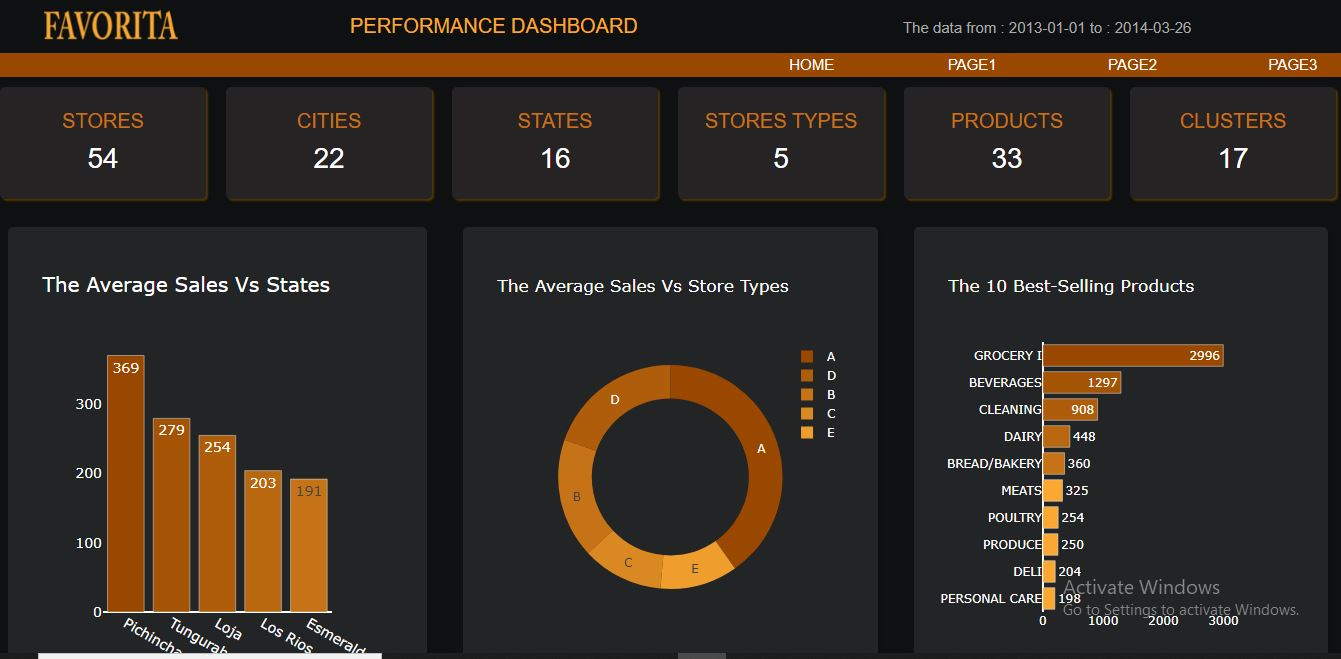

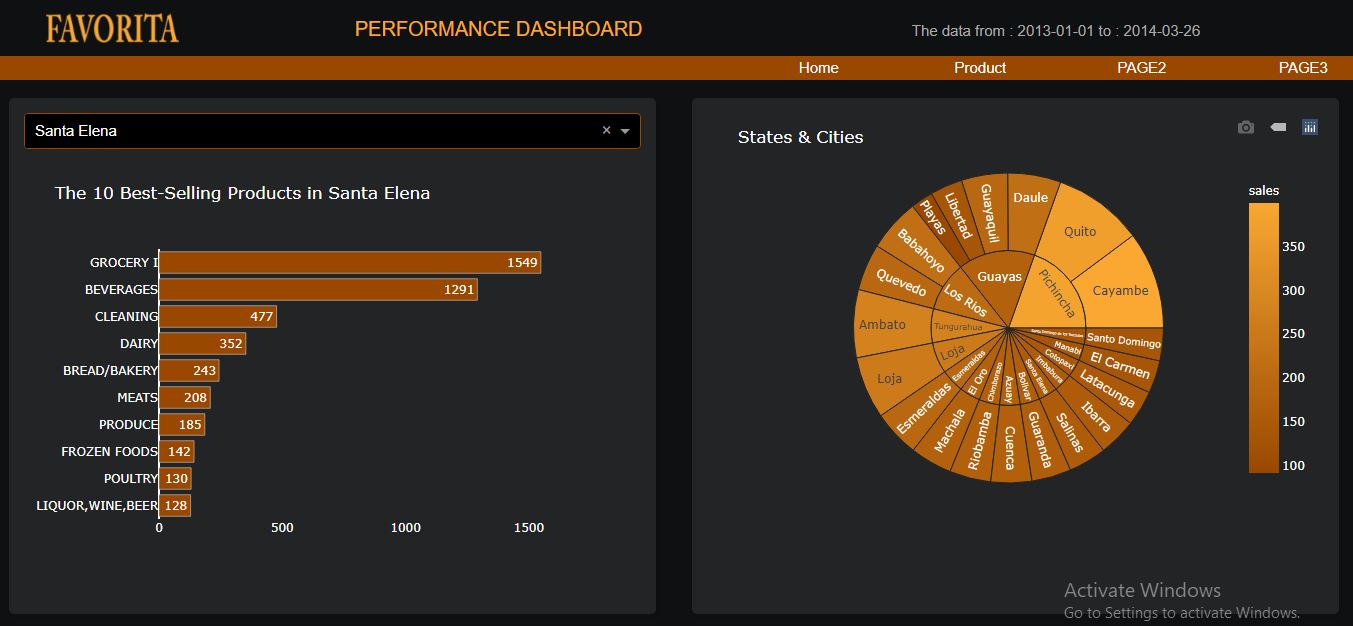

# Importing the libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt


import calendar

import plotly.express as px
from plotly.subplots import make_subplots
import plotly.figure_factory as ff
import plotly.offline as offline
import plotly.graph_objs as go
offline.init_notebook_mode(connected = True)

# Reading Data

In [ ]:
df_holi = pd.read_csv('../input/store-sales-time-series-forecasting/holidays_events.csv')
df_oil = pd.read_csv('../input/store-sales-time-series-forecasting/oil.csv')
df_stores = pd.read_csv('../input/store-sales-time-series-forecasting/stores.csv')
df_trans = pd.read_csv('../input/store-sales-time-series-forecasting/transactions.csv')
df_train = pd.read_csv('../input/store-sales-time-series-forecasting/train.csv')
df_test = pd.read_csv('../input/store-sales-time-series-forecasting/test.csv')

In [ ]:
#df_train=df_train.head(800000)

In [ ]:
df_train.info()

In [ ]:
stores_num = df_stores.shape[0]
type_store_num = len(df_stores.groupby('type').size())
product_num = len(df_train.groupby('family').size())
cities_num = len(df_stores.groupby('city').size())
state_num = len(df_stores.groupby('state').size())

#df_train['date'] = pd.to_datetime(df_train['date'])
df_train.sort_values(by=['date'], inplace=True, ascending = True)
first_date=(df_train["date"].iloc[0])#.strftime("%Y-%m-%d")
last_date=(df_train["date"].iloc[-1])#.strftime("%Y-%m-%d")

fig0=go.Figure()
fig0.add_trace(go.Scatter(
    x=[0,1,2,3.2,4.5,5.5],
    y=[1.7, 1.7, 1.7, 1.7, 1.7, 1.7],
    mode="text",
    text=["Stores","Cities","States","Store Types", "Products", "Cluster"],
    textposition="bottom center"
))
fig0.add_trace(go.Scatter(
    x=[0,1,2,3.2,4.5,5.5],
    y=[1.1, 1.1, 1.1, 1.1, 1.1, 1.1],
    mode="text", 
    text=["<span style='font-size:24px'><b>"+ str(stores_num) +"</b></span>", 
          "<span style='font-size:24px'><b>"+ str(cities_num) +"</b></span>",
          "<span style='font-size:24px'><b>"+ str(state_num) + "</b></span>",
          "<span style='font-size:24px'><b>"+ str(type_store_num) + "</b></span>",
          "<span style='font-size:24px'><b>"+ str(product_num) + "</b></span>",
          "<span style='font-size:24px'><b>17</b></span>"],
    textposition="bottom center"
))
fig0.add_hline(y=2.2, line_width=5, line_color='orange')
fig0.add_hline(y=0.3, line_width=3, line_color='orange')
fig0.add_trace(go.Scatter(
    x=[2.5],
    y=[-0.2],
    mode="text",
    text=["<span style='font-size:18px'><b>The date of data is  from " + first_date + " to " + last_date +"</b></span>"],
    textposition="bottom center"
))


fig0.update_yaxes(visible=False)
fig0.update_xaxes(visible=False)
fig0.update_layout(showlegend=False, height=300, width=800, 
                  title='Store Sales Summary', title_x=0.5, title_y=0.9,
                  xaxis_range=[-0.5,6.6], yaxis_range=[-1.2,2.2],
                  plot_bgcolor='#fafafa', paper_bgcolor='#fafafa',
                  font=dict(size=20, color='#323232'),
                  title_font=dict(size=28, color='#222'),
                  margin=dict(t=90,l=70,b=0,r=70), 
    )

# Merging The Data

In [ ]:
# copying of train data and merging other data
df_train1 = df_train.merge(df_holi, on = 'date', how='left')
df_train1 = df_train1.merge(df_oil, on = 'date', how='left')
df_train1 = df_train1.merge(df_stores, on = 'store_nbr', how='left')
df_train1 = df_train1.merge(df_trans, on = ['date', 'store_nbr'], how='left')
df_train1 = df_train1.rename(columns = {"type_x" : "holiday_type", "type_y" : "store_type"})

df_train1['date'] = pd.to_datetime(df_train1['date'])
df_train1['year'] = df_train1['date'].dt.year
df_train1['month'] = df_train1['date'].dt.month
df_train1['week'] = df_train1['date'].dt.isocalendar().week
df_train1['quarter'] = df_train1['date'].dt.quarter
df_train1['day_of_week'] = df_train1['date'].dt.day_name()
df_train1.sample(n=4)

In [ ]:
colors={}
def colorFader(c1,c2,mix=0): 
    c1=np.array(mpl.colors.to_rgb(c1))
    c2=np.array(mpl.colors.to_rgb(c2))
    return mpl.colors.to_hex((1-mix)*c1 + mix*c2)
c1='#FAA831' 
c2='#9A4800' 
n=9
for x in range(n+1):
    colors['level'+ str(n-x+1)] = colorFader(c1,c2,x/n) 
colors['background'] = '#232425'
colors['text'] = '#fff'


In [ ]:
colors

# Average Sales Analysis 
### The 10 Best-Selling Products 

In [ ]:
df_fa_sa = df_train1.groupby('family').agg({"sales" : "mean"}).reset_index().sort_values(by='sales', ascending=False)[:10]
df_fa_sa['color'] = colors['level10']
df_fa_sa['color'][:1] = colors['level1']
df_fa_sa['color'][1:2] = colors['level2']
df_fa_sa['color'][2:3] = colors['level3']
df_fa_sa['color'][3:4] = colors['level4']
df_fa_sa['color'][4:5] = colors['level5']

fig1 = go.Figure(data=[go.Bar(x=df_fa_sa['sales'],
                             y=df_fa_sa['family'], 
                             marker=dict(color= df_fa_sa['color']),
                             name='Family', orientation='h',
                             text=df_fa_sa['sales'].astype(int),
                             textposition='auto',
                             hoverinfo='text',
                             hovertext=
                            '<b>Family</b>:'+ df_fa_sa['family'] +'<br>' +
                            '<b>Sales</b>:'+ df_fa_sa['sales'].astype(int).astype(str) +'<br>' ,
                            # hovertemplate='Family: %{y}'+'<br>Sales: $%{x:.0f}'
                            )])
fig1.update_layout(title_text='The 10 Best-Selling Products ',paper_bgcolor=colors['background'],plot_bgcolor=colors['background'],
                font=dict(
                size=14,
                color='white'))

fig1.update_yaxes(showgrid=False, categoryorder='total ascending')



### The Average Sales Vs Store Types

In [ ]:
df_st_sa = df_train1.groupby('store_type').agg({"sales" : "mean"}).reset_index().sort_values(by='sales', ascending=False)
fig2=go.Figure(data=[go.Pie(values=df_st_sa['sales'], labels=df_st_sa['store_type'], name='Store type',
                     marker=dict(colors=[colors['level1'],colors['level3'],colors['level5'],colors['level7'],colors['level9']]), hole=0.7,
                     hoverinfo='label+percent+value', textinfo='label'
                    )])
fig2.update_layout(title_text='The Average Sales Vs Store Types',paper_bgcolor="#000000",plot_bgcolor='#1f2c56',
                font=dict(
                size=14,
                color='white'))
fig2.update_yaxes(showgrid=False, categoryorder='total ascending')

### Clusters Vs Sales

In [ ]:
df_cl_sa = df_train1.groupby('cluster').agg({"sales" : "mean"}).reset_index().sort_values(by='sales', ascending=False)
df_cl_sa['color'] = colors['level10']
df_cl_sa['color'][:1] = colors['level1']
df_cl_sa['color'][1:2] = colors['level2']
df_cl_sa['color'][2:3] = colors['level3']
df_cl_sa['color'][3:4] = colors['level4']
df_cl_sa['color'][4:5] = colors['level5']
fig3 = go.Figure(data=[go.Bar(y=df_cl_sa['sales'],
                             x=df_cl_sa['cluster'], 
                             marker=dict(color= df_cl_sa['color']),
                             name='Cluster',
                             text=df_cl_sa['sales'].astype(int),
                             textposition='auto',
                             hoverinfo='text',
                             hovertext=
                            '<b>Cluster</b>:'+ df_cl_sa['cluster'].astype(str) +'<br>' +
                            '<b>Sales</b>:'+ df_cl_sa['sales'].astype(int).astype(str) +'<br>' ,
                            # hovertemplate='Family: %{y}'+'<br>Sales: $%{x:.0f}'
                            )])
fig3.update_layout(title_text='Clusters Vs Sales',paper_bgcolor=colors['background'],plot_bgcolor=colors['background'],
                font=dict(
                size=14,
                color='white'))

fig3.update_xaxes(tickmode = 'array', tickvals=df_cl_sa.cluster)
fig3.update_yaxes(showgrid=False)

### The Average Sales Vs Cities

In [ ]:
df_city_sa = df_train1.groupby('city').agg({"sales" : "mean"}).reset_index().sort_values(by='sales', ascending=False)
df_city_sa['color'] = colors['level10']
df_city_sa['color'][:1] = colors['level1']
df_city_sa['color'][1:2] = colors['level2']
df_city_sa['color'][2:3] = colors['level3']
df_city_sa['color'][3:4] = colors['level4']
df_city_sa['color'][4:5] = colors['level5']

fig4 = go.Figure(data=[go.Bar(y=df_city_sa['sales'],
                             x=df_city_sa['city'], 
                             marker=dict(color= df_city_sa['color']),
                             name='State',
                             text=df_city_sa['sales'].astype(int),
                             textposition='auto',
                             hoverinfo='text',
                             hovertext=
                            '<b>City</b>:'+ df_city_sa['city'] +'<br>' +
                            '<b>Sales</b>:'+ df_city_sa['sales'].astype(int).astype(str) +'<br>' ,
                            # hovertemplate='Family: %{y}'+'<br>Sales: $%{x:.0f}'
                            )])
fig4.update_layout(title_text='The Average Sales Vs Cities',paper_bgcolor=colors['background'],plot_bgcolor=colors['background'],
                font=dict(
                size=14,
                color='white'))

fig4.update_yaxes(showgrid=False, categoryorder='total ascending')

### The Average Sales Vs States

In [ ]:
df_state_sa = df_train1.groupby('state').agg({"sales" : "mean"}).reset_index().sort_values(by='sales', ascending=False)
df_state_sa['color'] = colors['level10']
df_state_sa['color'][:1] = colors['level1']
df_state_sa['color'][1:2] = colors['level2']
df_state_sa['color'][2:3] = colors['level3']
df_state_sa['color'][3:4] = colors['level4']
df_state_sa['color'][4:5] = colors['level5']
df_state_sa
fig5 = go.Figure(data=[go.Bar(y=df_state_sa['sales'],
                             x=df_state_sa['state'], 
                             marker=dict(color= df_state_sa['color']),
                             name='State',
                             text=df_state_sa['sales'].astype(int),
                             textposition='auto',
                             hoverinfo='text',
                             hovertext=
                            '<b>State</b>:'+ df_state_sa['state'] +'<br>' +
                            '<b>Sales</b>:'+ df_state_sa['sales'].astype(int).astype(str) +'<br>' ,
                            # hovertemplate='Family: %{y}'+'<br>Sales: $%{x:.0f}'
                            )])
fig5.update_layout(title_text='The Average Sales Vs States',paper_bgcolor=colors['background'],plot_bgcolor=colors['background'],
                font=dict(
                size=14,
                color='white'))

fig5.update_yaxes(showgrid=False, categoryorder='total ascending')

### The Average Daily Sales

In [ ]:
df_day_sa = df_train1.groupby('date').agg({"sales" : "mean"}).reset_index()
fig6 = go.Figure(data=[go.Scatter(x=df_day_sa['date'], y=df_day_sa['sales'], fill='tozeroy', fillcolor='#FAA831', line_color='#bA6800'                                 )])
fig6.update_layout(title_text='The Average Daily Sales',height=300,paper_bgcolor='#232425',plot_bgcolor='#232425',
                font=dict(
                size=12,
                color='white'))
fig6.update_xaxes(showgrid=False)
fig6.update_yaxes(showgrid=False)


### The Average Weekly Sales

In [ ]:
df_w_sa = df_train1.groupby('week').agg({"sales" : "mean"}).reset_index()
fig7 = go.Figure(data=[go.Scatter(x=df_w_sa['week'], y=df_w_sa['sales'], fill='tozeroy', fillcolor='#FAA831', line_color='#bA6800'
                                  ,mode='lines+markers')])


fig7.update_layout(title_text='The Average Weekly Sales',height=300,paper_bgcolor='#232425',plot_bgcolor='#232425',
                font=dict(
                size=12,
                color='white'))
fig7.update_yaxes(showgrid=False)
fig7.update_xaxes(showgrid=False,tickmode = 'array', tickvals=df_w_sa.week, ticktext=[i for i in range(1,53)])

### The Average monthly Sales

In [ ]:
df_mon_sa = df_train1.groupby('month').agg({"sales" : "mean"}).reset_index()
fig8 = go.Figure(data=[go.Scatter(x=df_mon_sa['month'], y=df_mon_sa['sales'], fill='tozeroy', fillcolor='#FAA831', line_color='#bA6800'
                                  ,mode='lines+markers')])


fig8.update_layout(title_text='The Average Monthly Sales',height=300,paper_bgcolor='#232425',plot_bgcolor='#232425',
                font=dict(
                size=12,
                color='white'))
fig8.update_yaxes(showgrid=False)
fig8.update_xaxes(showgrid=False,tickmode = 'array', tickvals=df_mon_sa.month)

# Average Quarterly Sales

In [ ]:
df_qu_sa = df_train1.groupby('quarter').agg({"sales" : "mean"}).reset_index()
fig9 = go.Figure(data=[go.Scatter(x=df_qu_sa['quarter'], y=df_mon_sa['sales'], fill='tozeroy', fillcolor='#FAA831', line_color='#bA6800'
                                  ,mode='lines+markers')])


fig9.update_layout(title_text='The Average Quarterly Sales',height=300,paper_bgcolor='#232425',plot_bgcolor='#232425',
                font=dict(
                size=12,
                color='white'))
fig9.update_yaxes(showgrid=False)
fig9.update_xaxes(showgrid=False,tickmode = 'array', tickvals=df_qu_sa.quarter)

### The Average Annual  Sales

In [ ]:
df_y_sa = df_train1.groupby('year').agg({"sales" : "mean"}).reset_index()
fig10= go.Figure(data=[go.Scatter(x=df_y_sa['year'], y=df_y_sa['sales'], fill='tozeroy', fillcolor='#FAA831', line_color='#bA6800'
                                  ,mode='lines+markers')])


fig10.update_layout(title_text='The Average Annual Sales',height=300,paper_bgcolor='#232425',plot_bgcolor='#232425',
                font=dict(
                size=12,
                color='white'))
fig10.update_yaxes(showgrid=False)
fig10.update_xaxes(showgrid=False,tickmode = 'array', tickvals=df_y_sa.year)

### The States & Cities

In [ ]:
df_c_s_sa = df_train1.groupby(['state','city']).agg({"sales" : "mean"}).reset_index()
df_c_s_sa=df_c_s_sa[df_c_s_sa.sales>0]
fig11 = px.sunburst(df_c_s_sa, path=['state', 'city' ], 
                    values='sales',color='sales',
                    color_continuous_scale=[colors['level1'], colors['level10']])

fig11.update_layout(title_text='States & Cities',width = 700,paper_bgcolor='#232425',plot_bgcolor='#232425',font=dict(color=colors['text']))
fig11.show()